In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# To load the dataset
df =pd.read_csv("/content/drive/MyDrive/data analytic -20220106T192432Z-001/data analytic/diabeties.csv")
df

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


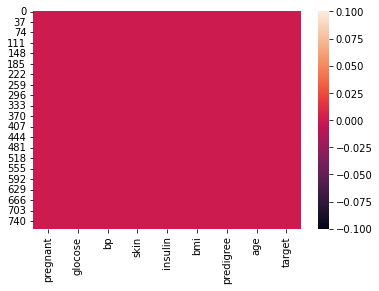

In [3]:
# Check the null values.
sns.heatmap(df.isnull())
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   glocose    768 non-null    int64  
 2   bp         768 non-null    int64  
 3   skin       768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   predigree  768 non-null    float64
 7   age        768 non-null    int64  
 8   target     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Seperate the Input and Output data
X = df.drop("target",axis=1)  # Input variable
Y = df["target"]  # Output or target variable 

In [6]:
# Train test split the data into 70% - 30%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 1)

**Standardization**

In [7]:
# Scaling the data using the StandardScaler class
from sklearn.preprocessing import StandardScaler
# create the baseline model with logistic Regression 
# Also importing the classification_reprot and confusion_matrix class
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [8]:
# Create the object StandardScaler() class 
ss = StandardScaler()
X_train = ss.fit_transform(X_train)   # Training data
X_test = ss.transform(X_test)         # Testing data

In [9]:
# Create the function 
def create_model(model):
  model.fit(X_train,Y_train)
  Y_pred = model.predict(X_test)
  print("Classification Report : ")
  print(classification_report(Y_test,Y_pred))
  print("Confusion Matrix : ")
  print(confusion_matrix(Y_test,Y_pred))
  return model

In [10]:
# Create the object for LogisticRegression() class
lr = LogisticRegression()

In [11]:
# call the function
lr = create_model(lr)

Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231

Confusion Matrix : 
[[132  14]
 [ 36  49]]


**Support Vector Machine**

In [12]:
#use SVM :-support vector machine :-this is a classification supervised learning algo
# there are various kernel functions:
# 1.Linear kernel function (use linear separated data)
# 2.polynominal kernel function (non-linear)
# 3.radial basis kernel function (non-linearly)'''

In [13]:
#Linear Kernel function means data is linearly separately
#use inbuilt class Linear SVC which define in svm inbuilt package
from sklearn.svm import LinearSVC

In [14]:
# Create the object for LinearSVC class()
svc = LinearSVC(random_state=1)  #by default hard margin means no add any error on trading time

In [15]:
# Call the function
svc = create_model(svc)

Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231

Confusion Matrix : 
[[132  14]
 [ 36  49]]


In [16]:
# Apply soft margin means add externally error on training time 
# Create the object of inbuilt class LinearSVC and Passing parameter C for error
svc1=LinearSVC(random_state=1,C=0.05)  # Soft margin
# Range of C = 0.01 TO 0.9  
# Soft Margin means to reduced overfitting situation and remove the outlier
# C is parameter which is used to add error on training time 

In [18]:
# Call the function 
svc1 = create_model(svc1)

Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231

Confusion Matrix : 
[[132  14]
 [ 36  49]]


In [19]:
###  Score is not good but the same , so its Non_Linear data
##### Here , if add external error on runtime but no changes in score means no effect on score. means we have data is non- linear data, not linear dataset.

So, we will use polynomial kernal funciton means increase the dimension means to convert the low dimension data into high dimension means if plot 1D then converting into 2D dimension and so on.

In [20]:
# Polynomial Kerenal function (non-linear)
from sklearn.svm import SVC

In [22]:
# Create the object for SVC class
poly = SVC(random_state=1,kernel="poly")

In [23]:
# call the function
poly = create_model(poly)

Classification Report : 
              precision    recall  f1-score   support

           0       0.72      0.97      0.82       146
           1       0.86      0.35      0.50        85

    accuracy                           0.74       231
   macro avg       0.79      0.66      0.66       231
weighted avg       0.77      0.74      0.71       231

Confusion Matrix : 
[[141   5]
 [ 55  30]]


In [25]:
# Radial Kerenal function (non-linear)
# Create the object for SVC (Radial)
radial = SVC(random_state=1,kernel='rbf')

In [26]:
# Call the function
radial = create_model(radial)

Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       146
           1       0.80      0.58      0.67        85

    accuracy                           0.79       231
   macro avg       0.80      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231

Confusion Matrix : 
[[134  12]
 [ 36  49]]
